In [230]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Generate BS signal

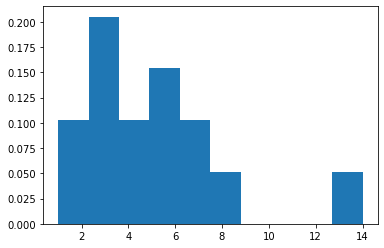

In [231]:
l_x = 15 # number of pulses per measurement or number of measurements
lambda_x =5
x_l =np.random.poisson(lambda_x, l_x)
count, bins, ignored = plt.hist(x_l, density=True)
plt.show()

Generate BG signal

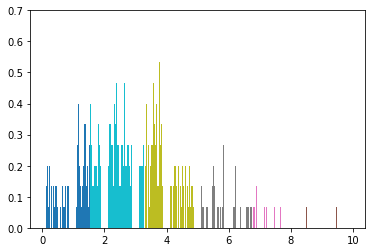

In [232]:
lambda_n = 2.5
l_n = 248 # number of BG bins per a single time bin
n_l =  np.random.poisson(lambda_n, (l_x,l_n))
count, bins, ignored = plt.hist(n_l, density=True)
plt.show()

Generate lidar measurement signal

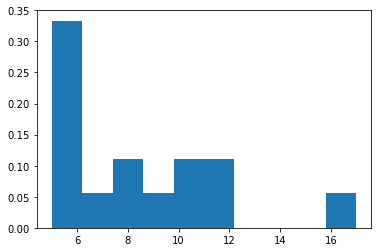

In [233]:
y_l = np.random.poisson(lambda_n+lambda_x,l_x)
count, bins, ignored = plt.hist(y_l, density=True)
plt.show()

## $\hat{\lambda}_{n,i} = \frac{1}{n_{BG}}\sum{y_{BG,i}} $
## $\hat{x}_{bad}= \frac{1}{n}\sum({y_i-\hat{\lambda}_n})$
## $\hat{x}_{good}= \Big[ \frac{1}{n}\sum{y_i} - \hat{\lambda}_n \Big]^+$
## $\hat{x}_{old}= \frac{1}{n}\sum({y_i-\hat{\lambda}_n})$
## $\hat{x}_{new}= \frac{1}{n}\sum[{y_i-\hat{\lambda}_n}]^+$

In [234]:
n_l_hat = n_l.mean(axis=1)
lambda_n_hat =  n_l_hat.mean()

x_hat_bad = np.mean(y_l-lambda_n_hat)
x_hat_good = max( np.mean(y_l)-lambda_n_hat,0)

x_hat_old = np.mean(y_l-n_l_hat)
dif_corr = y_l-n_l_hat
dif_corr[dif_corr<0]=0
x_hat_new = dif_corr.mean()
print('x_hat_bad:',x_hat_bad,'\nx_hat_good',x_hat_good)
print('x_hat_old:',x_hat_old,'\nx_hat_new',x_hat_new)

x_hat_bad: 5.925537634408601 
x_hat_good 5.925537634408602
x_hat_old: 5.9255376344086015 
x_hat_new 5.9255376344086015


In [235]:
err = lambda x,x_hat: np.sqrt((x-x_hat)**2)
norm_err = lambda x,x_hat: err(x,x_hat)/x

In [236]:
err_old = err(x= lambda_x, x_hat =x_hat_old)
norm_err_old = norm_err(x= lambda_x, x_hat =x_hat_old)
err_new = err(x= lambda_x, x_hat =x_hat_new)
norm_err_new = norm_err(x= lambda_x, x_hat =x_hat_new)
err_bad = err(x= lambda_x, x_hat =x_hat_bad)
norm_err_bad = norm_err(x= lambda_x, x_hat =x_hat_bad)
err_good = err(x= lambda_x, x_hat =x_hat_good)
norm_err_good = norm_err(x= lambda_x, x_hat =x_hat_good)

print('err_old:',err_old, 'norm_err_old:',norm_err_old*100)
print('err_new:', err_new, 'norm_err_new:',norm_err_new*100)

print('\nerr_bad:',err_bad, 'norm_err_bad:',norm_err_bad*100)
print('err_good:', err_good, 'norm_err_good:',norm_err_good*100)

err_old: 0.9255376344086015 norm_err_old: 18.51075268817203
err_new: 0.9255376344086015 norm_err_new: 18.51075268817203

err_bad: 0.9255376344086006 norm_err_bad: 18.510752688172012
err_good: 0.9255376344086024 norm_err_good: 18.510752688172047


In [237]:
np.logspace(-0.5, .5, 29, endpoint=True)
lambda_xs =np.append(0.01,np.logspace(-.25, 2.5, 29, endpoint=True))# ,np.logspace(-.5, 2, 29, endpoint=True)])
lambda_ns =np.append(0.01,np.logspace(-.75, 0.75, 29, endpoint=True))
lambda_ns,lambda_xs

(array([0.01      , 0.17782794, 0.2011738 , 0.22758459, 0.25746268,
        0.29126327, 0.32950131, 0.37275937, 0.4216965 , 0.47705827,
        0.53968812, 0.61054023, 0.69069405, 0.78137074, 0.88395177,
        1.        , 1.13128344, 1.27980221, 1.44781905, 1.63789371,
        1.85292202, 2.09617999, 2.37137371, 2.6826958 , 3.03488932,
        3.43332002, 3.88405807, 4.39397056, 4.97082612, 5.62341325]),
 array([1.00000000e-02, 5.62341325e-01, 7.05040858e-01, 8.83951773e-01,
        1.10826306e+00, 1.38949549e+00, 1.74209337e+00, 2.18416636e+00,
        2.73841963e+00, 3.43332002e+00, 4.30455807e+00, 5.39688119e+00,
        6.76639182e+00, 8.48342898e+00, 1.06361809e+01, 1.33352143e+01,
        1.67191535e+01, 2.09617999e+01, 2.62810588e+01, 3.29501308e+01,
        4.13115442e+01, 5.17947468e+01, 6.49381632e+01, 8.14168481e+01,
        1.02077158e+02, 1.27980221e+02, 1.60456436e+02, 2.01173804e+02,
        2.52223597e+02, 3.16227766e+02]))

In [249]:

df_lambda_x = pd.DataFrame(np.random.poisson(lambda_xs, (l_x,30)))
df_lambda_x.columns= lambda_xs
df_lambda_n = pd.DataFrame(np.random.poisson(lambda_ns, (l_n,30)))
df_lambda_n.columns= lambda_ns

In [250]:
df_mat_bad = pd.DataFrame(columns=lambda_xs,index=lambda_ns)
df_mat_good = pd.DataFrame(columns=lambda_xs,index=lambda_ns)
df_mat_old = pd.DataFrame(columns=lambda_xs,index=lambda_ns)
df_mat_new = pd.DataFrame(columns=lambda_xs,index=lambda_ns)
df_mat_new

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.177828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.201174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.227585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.257463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.291263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.329501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.372759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.421697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.477058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# TODO: Validate the calculations in the following cell
# Validate error calculations
# plot the error for each method as a 2D (cross correlation matrix)

# calculate estimations when considering same profile for 60 bins, and same lambda (to compare bad and good)
# calculate estimations on a single ALiDAn measurement (to compare old and new) for 10 different values of BG noise
# Show estimations on daily PollyXT measurement, and specifically show the results for the reference range heights
# The next step should consider calculation of "new" approach using pollynet (to compare current and new calibration results)

In [240]:
for cur_lambda_n in df_mat_new.index:
    row = cur_lambda_n
    cur_n_l =  np.random.poisson(cur_lambda_n, (l_x,l_n))
    cur_n_l_hat = cur_n_l.mean(axis=1)
    cur_avg_n = cur_n_l_hat.mean()
    #print(cur_n_l_hat)
    for cur_lambda_x in df_mat_new.columns:
        col = cur_lambda_x
        cur_y_l = np.random.poisson(cur_lambda_n+cur_lambda_x,l_x)

        df_mat_bad[col][row] = np.mean(cur_y_l-cur_avg_n)
        df_mat_old[col][row] = np.mean(cur_y_l-cur_n_l_hat)
        df_mat_good[col][row] = max( np.mean(cur_y_l)-cur_avg_n,0)
        dif_corr = cur_y_l-cur_n_l_hat
        dif_corr[dif_corr<0]=0
        df_mat_new[col][row] = dif_corr.mean()

        #print(cur_lambda_n,cur_lambda_x)


In [241]:
df_mat_old

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,-0.009409,0.723925,0.590591,0.723925,0.923925,1.657258,1.790591,2.723925,2.923925,2.990591,...,41.190591,50.257258,64.057258,84.190591,104.657258,126.657258,165.390591,208.590591,254.590591,309.723925
0.177828,-0.052151,0.347849,0.814516,1.147849,0.947849,1.681183,1.747849,1.614516,3.014516,2.947849,...,40.614516,53.014516,62.414516,90.481183,101.747849,131.947849,164.081183,202.147849,255.014516,315.347849
0.201174,-0.006452,0.793548,0.793548,1.126882,1.126882,1.393548,1.860215,2.193548,2.526882,3.660215,...,41.193548,51.860215,65.726882,84.060215,100.860215,133.060215,161.860215,202.126882,250.593548,311.660215
0.227585,-0.031989,0.634677,0.568011,0.501344,0.968011,1.434677,1.634677,2.101344,2.701344,3.034677,...,42.301344,53.234677,66.301344,80.701344,103.234677,126.701344,157.834677,204.368011,248.701344,319.034677
0.257463,0.262097,0.59543,0.79543,0.928763,0.39543,1.728763,2.062097,2.128763,2.728763,3.262097,...,41.462097,48.59543,64.862097,76.39543,98.99543,130.39543,160.128763,199.862097,253.862097,317.39543
0.291263,0.172849,0.772849,0.839516,0.839516,1.039516,1.372849,1.506183,2.106183,2.772849,2.906183,...,40.706183,51.306183,66.439516,83.706183,99.639516,131.172849,158.706183,203.306183,253.306183,315.039516
0.329501,-0.128226,0.538441,0.205108,1.071774,1.138441,1.605108,1.871774,1.605108,1.805108,3.605108,...,41.005108,51.071774,66.605108,80.338441,102.338441,130.605108,165.605108,207.138441,251.938441,314.271774
0.372759,0.15672,0.890054,0.75672,1.023387,0.890054,1.090054,1.823387,1.75672,2.090054,3.690054,...,41.223387,49.35672,64.95672,83.623387,105.690054,127.95672,162.623387,198.890054,254.490054,311.623387
0.421697,-0.083065,0.850269,0.783602,1.183602,1.050269,1.583602,1.316935,2.516935,2.583602,3.850269,...,42.783602,52.716935,63.783602,81.050269,101.450269,126.516935,158.850269,204.850269,252.183602,312.050269
0.477058,-0.06371,0.269624,0.73629,1.269624,0.669624,1.202957,2.73629,3.269624,1.73629,4.002957,...,41.069624,52.469624,66.202957,85.002957,96.13629,127.33629,164.53629,197.602957,256.669624,323.269624


In [242]:
err_old_df = ((df_mat_old.columns-df_mat_old+1e-16)**2)**.5
norm_err_old_df  = 100*err_old_df/(df_mat_old.columns+1e-16)
norm_err_old_df

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,194.086022,28.734044,16.233025,18.103594,16.633084,19.270489,2.783894,24.712329,6.774166,12.895058,...,0.292782,2.968426,1.356529,3.406842,2.527598,1.033725,3.075074,3.686756,0.938451,2.056695
0.177828,621.505376,38.142646,15.527507,29.854308,14.474325,20.992317,0.330412,26.080899,10.08233,14.139974,...,1.687248,2.355006,3.886231,11.133242,0.322608,3.100188,2.259022,0.484181,1.106526,0.278254
0.201174,164.516129,41.115076,12.553532,27.482263,1.679986,0.291681,6.780445,0.429547,7.724817,6.608619,...,0.285624,0.126399,1.214569,3.246707,1.19218,3.969358,0.874866,0.473758,0.646271,1.444386
0.227585,419.892473,12.863379,19.435768,43.283774,12.655146,3.251678,6.165913,3.79194,1.353903,11.610995,...,2.39594,2.780071,2.099198,0.878816,1.133965,0.999277,1.633938,1.587785,1.39648,0.887623
0.257463,2520.967742,5.88411,12.820427,5.06947,64.319833,24.416628,18.368901,2.536571,0.352619,4.987104,...,0.364432,6.176913,0.117137,6.167542,3.019018,1.887173,0.204213,0.652027,0.649622,0.369248
0.291263,1628.494624,37.434229,19.073401,5.026931,6.203124,1.197991,13.541787,3.570404,1.257288,15.353571,...,1.465356,0.943269,2.311973,2.811868,2.388039,2.494626,1.090797,1.059968,0.429217,0.375758
0.329501,1382.258065,4.25017,70.90842,21.248039,2.722982,15.517289,7.443965,26.511663,34.082143,5.003539,...,0.74177,1.395842,2.566972,1.324551,0.255966,2.051009,3.208766,2.964917,0.113057,0.618539
0.372759,1467.204301,58.276428,7.330011,15.774087,19.689305,21.550392,4.666439,19.570209,23.676644,7.477711,...,0.213396,4.707092,0.028577,2.710175,3.539377,0.018363,1.350492,1.135213,0.89859,1.456032
0.421697,930.645161,51.201553,11.1428,33.898951,5.232895,13.969578,24.405,15.235521,5.653534,12.144187,...,3.563309,1.780468,1.777939,0.45025,0.614133,1.143369,1.000999,1.827507,0.015857,1.321041
0.477058,737.096774,52.05338,4.432291,43.630421,39.578997,13.424909,57.069097,49.69664,36.59517,16.591432,...,0.5856,1.302983,1.94769,4.404627,5.819978,0.503149,2.542655,1.775006,1.762732,2.226831


In [243]:
err_new_df = ((df_mat_new.columns-df_mat_new+1e-16)**2)**.5
norm_err_new_df  = 100*err_new_df/(df_mat_new.columns+1e-16)
norm_err_new_df

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,100.0,29.403289,15.813618,17.738664,16.099458,19.270489,2.861047,24.712329,6.813432,12.895058,...,0.292782,2.968426,1.356529,3.406842,2.527598,1.033725,3.075074,3.686756,0.938451,2.056695
0.177828,1007.526882,17.682872,25.555142,34.720044,7.92528,20.992317,1.040224,25.57629,10.08233,14.139974,...,1.687248,2.355006,3.886231,11.133242,0.322608,3.100188,2.259022,0.484181,1.106526,0.278254
0.201174,1421.505376,51.631782,22.809934,32.80416,4.590672,4.296383,8.508683,1.044924,7.724817,6.608619,...,0.285624,0.126399,1.214569,3.246707,1.19218,3.969358,0.874866,0.473758,0.646271,1.444386
0.227585,1453.763441,26.248277,8.759959,32.670389,8.580185,6.61795,6.165913,1.576582,1.353903,11.610995,...,2.39594,2.780071,2.099198,0.878816,1.133965,0.999277,1.633938,1.587785,1.39648,0.887623
0.257463,3961.827957,21.181137,26.393956,17.933257,52.871133,27.337933,20.421184,0.653517,0.352619,4.509495,...,0.364432,6.176913,0.117137,6.167542,3.019018,1.887173,0.204213,0.652027,0.649622,0.369248
0.291263,3437.634409,47.520706,31.121814,6.255493,2.480425,3.058215,11.18089,1.835041,2.101508,15.353571,...,1.465356,0.943269,2.311973,2.811868,2.388039,2.494626,1.090797,1.059968,0.429217,0.375758
0.329501,1268.27957,23.523495,46.277803,31.587727,4.639184,19.135064,8.66299,26.511663,33.306639,5.003539,...,0.74177,1.395842,2.566972,1.324551,0.255966,2.051009,3.208766,2.964917,0.113057,0.618539
0.372759,3727.956989,71.231098,27.652176,21.004753,8.580185,15.66909,5.962618,18.26561,22.645911,7.477711,...,0.213396,4.707092,0.028577,2.710175,3.539377,0.018363,1.350492,1.135213,0.89859,1.456032
0.421697,1787.096774,71.087688,23.114957,49.803823,0.21196,18.109705,17.970398,15.235521,4.671883,12.144187,...,3.563309,1.780468,1.777939,0.45025,0.614133,1.143369,1.000999,1.827507,0.015857,1.321041
0.477058,2633.870968,3.35054,26.203317,47.127668,20.125908,8.762429,57.069097,49.69664,35.309207,17.437035,...,0.5856,1.302983,1.94769,4.404627,5.819978,0.503149,2.542655,1.775006,1.762732,2.226831


In [244]:
norm_err_new_df - norm_err_old_df

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,-94.086022,0.669245,-0.419407,-0.36493,-0.533626,0.0,0.077154,0.0,0.039266,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.177828,386.021505,-20.459774,10.027635,4.865735,-6.549045,0.0,0.709812,-0.504609,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.201174,1256.989247,10.516706,10.256402,5.321898,2.910687,4.004703,1.728238,0.615377,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.227585,1033.870968,13.384899,-10.675809,-10.613385,-4.074961,3.366272,0.0,-2.215358,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.257463,1440.860215,15.297027,13.573529,12.863787,-11.448701,2.921305,2.052283,-1.883054,0.0,-0.477609,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.291263,1809.139785,10.086477,12.048413,1.228562,-3.722699,1.860223,-2.360897,-1.735363,0.84422,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.329501,-113.978495,19.273324,-24.630617,10.339687,1.916202,3.617775,1.219025,0.0,-0.775504,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.372759,2260.752688,12.95467,20.322165,5.230665,-11.109121,-5.881302,1.296179,-1.3046,-1.030733,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.421697,856.451613,19.886135,11.972158,15.904872,-5.020934,4.140127,-6.434602,0.0,-0.981651,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.477058,1896.774194,-48.702841,21.771025,3.497247,-19.453089,-4.66248,0.0,0.0,-1.285963,0.845603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [245]:
err_good_df = ((df_mat_good.columns-df_mat_good+1e-16)**2)**.5
norm_err_good_df  = 100*err_good_df/(df_mat_good.columns+1e-16)
norm_err_good_df

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,100.0,28.734044,16.233025,18.103594,16.633084,19.270489,2.783894,24.712329,6.774166,12.895058,...,0.292782,2.968426,1.356529,3.406842,2.527598,1.033725,3.075074,3.686756,0.938451,2.056695
0.177828,100.0,38.142646,15.527507,29.854308,14.474325,20.992317,0.330412,26.080899,10.08233,14.139974,...,1.687248,2.355006,3.886231,11.133242,0.322608,3.100188,2.259022,0.484181,1.106526,0.278254
0.201174,100.0,41.115076,12.553532,27.482263,1.679986,0.291681,6.780445,0.429547,7.724817,6.608619,...,0.285624,0.126399,1.214569,3.246707,1.19218,3.969358,0.874866,0.473758,0.646271,1.444386
0.227585,100.0,12.863379,19.435768,43.283774,12.655146,3.251678,6.165913,3.79194,1.353903,11.610995,...,2.39594,2.780071,2.099198,0.878816,1.133965,0.999277,1.633938,1.587785,1.39648,0.887623
0.257463,2520.967742,5.88411,12.820427,5.06947,64.319833,24.416628,18.368901,2.536571,0.352619,4.987104,...,0.364432,6.176913,0.117137,6.167542,3.019018,1.887173,0.204213,0.652027,0.649622,0.369248
0.291263,1628.494624,37.434229,19.073401,5.026931,6.203124,1.197991,13.541787,3.570404,1.257288,15.353571,...,1.465356,0.943269,2.311973,2.811868,2.388039,2.494626,1.090797,1.059968,0.429217,0.375758
0.329501,100.0,4.25017,70.90842,21.248039,2.722982,15.517289,7.443965,26.511663,34.082143,5.003539,...,0.74177,1.395842,2.566972,1.324551,0.255966,2.051009,3.208766,2.964917,0.113057,0.618539
0.372759,1467.204301,58.276428,7.330011,15.774087,19.689305,21.550392,4.666439,19.570209,23.676644,7.477711,...,0.213396,4.707092,0.028577,2.710175,3.539377,0.018363,1.350492,1.135213,0.89859,1.456032
0.421697,100.0,51.201553,11.1428,33.898951,5.232895,13.969578,24.405,15.235521,5.653534,12.144187,...,3.563309,1.780468,1.777939,0.45025,0.614133,1.143369,1.000999,1.827507,0.015857,1.321041
0.477058,100.0,52.05338,4.432291,43.630421,39.578997,13.424909,57.069097,49.69664,36.59517,16.591432,...,0.5856,1.302983,1.94769,4.404627,5.819978,0.503149,2.542655,1.775006,1.762732,2.226831


In [246]:
err_bad_df = ((df_mat_bad.columns-df_mat_bad+1e-16)**2)**.5
norm_err_bad_df  = 100*err_bad_df/(err_bad_df.columns+1e-16)
norm_err_bad_df

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,194.086022,28.734044,16.233025,18.103594,16.633084,19.270489,2.783894,24.712329,6.774166,12.895058,...,0.292782,2.968426,1.356529,3.406842,2.527598,1.033725,3.075074,3.686756,0.938451,2.056695
0.177828,621.505376,38.142646,15.527507,29.854308,14.474325,20.992317,0.330412,26.080899,10.08233,14.139974,...,1.687248,2.355006,3.886231,11.133242,0.322608,3.100188,2.259022,0.484181,1.106526,0.278254
0.201174,164.516129,41.115076,12.553532,27.482263,1.679986,0.291681,6.780445,0.429547,7.724817,6.608619,...,0.285624,0.126399,1.214569,3.246707,1.19218,3.969358,0.874866,0.473758,0.646271,1.444386
0.227585,419.892473,12.863379,19.435768,43.283774,12.655146,3.251678,6.165913,3.79194,1.353903,11.610995,...,2.39594,2.780071,2.099198,0.878816,1.133965,0.999277,1.633938,1.587785,1.39648,0.887623
0.257463,2520.967742,5.88411,12.820427,5.06947,64.319833,24.416628,18.368901,2.536571,0.352619,4.987104,...,0.364432,6.176913,0.117137,6.167542,3.019018,1.887173,0.204213,0.652027,0.649622,0.369248
0.291263,1628.494624,37.434229,19.073401,5.026931,6.203124,1.197991,13.541787,3.570404,1.257288,15.353571,...,1.465356,0.943269,2.311973,2.811868,2.388039,2.494626,1.090797,1.059968,0.429217,0.375758
0.329501,1382.258065,4.25017,70.90842,21.248039,2.722982,15.517289,7.443965,26.511663,34.082143,5.003539,...,0.74177,1.395842,2.566972,1.324551,0.255966,2.051009,3.208766,2.964917,0.113057,0.618539
0.372759,1467.204301,58.276428,7.330011,15.774087,19.689305,21.550392,4.666439,19.570209,23.676644,7.477711,...,0.213396,4.707092,0.028577,2.710175,3.539377,0.018363,1.350492,1.135213,0.89859,1.456032
0.421697,930.645161,51.201553,11.1428,33.898951,5.232895,13.969578,24.405,15.235521,5.653534,12.144187,...,3.563309,1.780468,1.777939,0.45025,0.614133,1.143369,1.000999,1.827507,0.015857,1.321041
0.477058,737.096774,52.05338,4.432291,43.630421,39.578997,13.424909,57.069097,49.69664,36.59517,16.591432,...,0.5856,1.302983,1.94769,4.404627,5.819978,0.503149,2.542655,1.775006,1.762732,2.226831


In [247]:
norm_err_good_df - norm_err_bad_df

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,-94.086022,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
0.177828,-521.505376,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
0.201174,-64.516129,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0
0.227585,-319.892473,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
0.257463,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,...,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0
0.291263,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0
0.329501,-1282.258065,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
0.372759,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
0.421697,-830.645161,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
0.477058,-637.096774,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0


In [248]:
norm_err_new_df-norm_err_good_df

,0.010000,0.562341,0.705041,0.883952,1.108263,1.389495,1.742093,2.184166,2.738420,3.433320,...,41.311544,51.794747,64.938163,81.416848,102.077158,127.980221,160.456436,201.173804,252.223597,316.227766
0.010000,0.0,0.669245,-0.419407,-0.36493,-0.533626,0.0,0.077154,0.0,0.039266,0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.177828,907.526882,-20.459774,10.027635,4.865735,-6.549045,-0.0,0.709812,-0.504609,0.0,0.0,...,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0
0.201174,1321.505376,10.516706,10.256402,5.321898,2.910687,4.004703,1.728238,0.615377,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
0.227585,1353.763441,13.384899,-10.675809,-10.613385,-4.074961,3.366272,-0.0,-2.215358,-0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
0.257463,1440.860215,15.297027,13.573529,12.863787,-11.448701,2.921305,2.052283,-1.883054,-0.0,-0.477609,...,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
0.291263,1809.139785,10.086477,12.048413,1.228562,-3.722699,1.860223,-2.360897,-1.735363,0.84422,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
0.329501,1168.27957,19.273324,-24.630617,10.339687,1.916202,3.617775,1.219025,0.0,-0.775504,-0.0,...,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
0.372759,2260.752688,12.95467,20.322165,5.230665,-11.109121,-5.881302,1.296179,-1.3046,-1.030733,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
0.421697,1687.096774,19.886135,11.972158,15.904872,-5.020934,4.140127,-6.434602,0.0,-0.981651,0.0,...,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0
0.477058,2533.870968,-48.702841,21.771025,3.497247,-19.453089,-4.66248,0.0,0.0,-1.285963,0.845603,...,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
